# Sample and Population

__Purpose:__ The purpose of this lecture is to compare sample vs. populations. 

__At the end of this lecture you will be able to:__
> 1. Understand the differences between working with samples and populations 

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import math 
import random
import matplotlib.pyplot as plt
%matplotlib inline

## 1.1 Sample vs. Population

### 1.1.1 What is a Sample and Population? 

__Overview:__ 
- It is important to differentiate between a Sample and Population in Statistical Analysis and also understand which of the two you are working with 
- __[Population](https://en.wikipedia.org/wiki/Statistical_population):__ Population refers to the complete set of observations/items/events that are of interest in an experiment
> - A researcher may be interested in a statistic regarding the population (for example, the mean of the population)
> - The population is defined by the researcher of the experiment ahead of time and is defined in a convenient fashion for their purposes 
> - Typically, the population is too large to study, thus warranting a smaller study that will allow the researcher to make inferences about the population 
> - The statistic of interest in the population is called a __Population Parameter__ (i.e. the Population Mean is represented as $\mu$ and is usually Greek letters)
- __[Sample](https://en.wikipedia.org/wiki/Sample_(statistics)):__ Sample refers to a subset of data that is collected from a population 
> - The purpose of the sample is to make inferences about the population, thus a sample must be chosen in a way that is representative of the population 
> - The statistic of interest in the population is called a __Sample Statistic__ (i.e. the Sample Mean is represented as $\bar x$)

__Helpful Points:__
1. There is an entire field of Statistical Analysis that deals with methods of creating a representative sample, but this is beyond the scope of this course 
2. A key part of Inferential Statistics is estimating how far Sample Statistics may vary from Population Parameters 

__Practice:__ Examples of Samples and Populations

### Problem 1:

The Executive Director at Metis is interested in learning how likely the students of this course from this cohort are to recommend the course to a friend. To measure this, the Executive Director provides a survey to the students and asks them how likely they are to recommend the course. 15 of 30 students answer the survey. Based on the answers of the 15 students who completed the survey, the Executive Director will make his conclusion. What is the Sample and what is the Population?

__Option A:__ Population = all students who have taken this course at Metis from all cohorts. Sample = all students from this course and cohort.

__Option B:__ Population = all students who have taken any course from Metis from all cohorts. Sample = all students of this course from all cohorts.

__Option C:__ Population = all students from this course and cohort. Sample = 15 students from this course and cohort who answered the survey

In [ ]:
# write your answer here 





### 1.1.2 Sampling Distributions:

__Overview:__ 
- __[Sampling Distribution](https://en.wikipedia.org/wiki/Sampling_distribution):__ Sampling Distribution is the Probability Distribution of a given statistic that is developed from repeatedly sampling from a population and recording the statistic of interest 
> - It is possible to have a Sampling Distribution for any statistic that we are interested in 
> - Sampling Distribution is developed in the following way: 
>> __Step 1:__ Decide on a statistic of the population you are interested in (for example, the population mean) <br> 
>> __Step 2:__ Sample n observations from the population and calculate the sample statistic (sample mean, in this case) of this sample of size n. Record this sample statistic <br>
>> __Step 3:__ Continue executing step 2 for a large number of iterations (i.e. 10,000), which means we have 10,000 samples of size n which corresponds to 10,000 sample means <br>
>> __Step 4:__ Plot the Probability Distribution of the 10,000 sample means and this becomes the Sampling Distribution of the Sample Mean 

__Helpful Points:__
1. The example above was for the Sampling Distribution of the Sample Mean, but any statistic can be calculated for each sample. For example, the Sampling Distribution of the Sample Range, Median, etc. 
2. It is helpful to specify some terminology: 
> __Estimand:__ The Estimand is the statistic we are interested in (i.e. the mean) <br> 
> __Estimate:__ The Estimate is the sample statistic we calculate for every given sample (this is a number) <br> 
> __Estimator:__ The Estimator is the Random Variable that is described by the Probability Distribution known as the Sampling Distribution. Therefore, each Estimate (sample statistic calculated for 10,000 samples) are realizations of this Random Variable 
3. The Probability Distribution called the Sampling Distribution also has parameters that define its distribution. The two parameters are the mean and standard deviation (known as the __Standard Error__). When the statistic is the sample mean, we call it the __Standard Error of the Mean__ and the formula is $\sigma_{\bar x} = \frac{\sigma}{\sqrt{n}}$

__Practice:__ Examples of Sampling Distributions in Python 

### Example 1 (Sampling Distribution - from Uniform Distribution with sample size 5 and 5 iterations):

In [2]:
# simulate uniform distribution 
a = 2
b = 10
num_samples = 100000
uniform_data = np.random.uniform(a, b, num_samples)

In [3]:
uniform_data.mean() # (a + b)/2 = (2 + 10)/2

5.996684393829748

In [4]:
uniform_data.var() # (b - a)^2/12 = (10 - 2)^2/12

5.320231120256072

In [5]:
np.median(uniform_data)

5.996321180700981

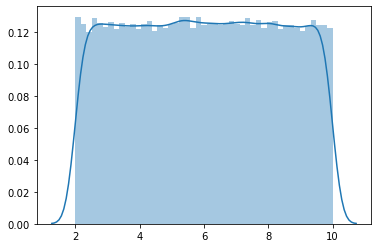

In [6]:
# plot the probability distribution 
sns.distplot(uniform_data)

We will consider the Population to be a series of numbers ranging from 1 to 10 that follow a Uniform Distribution. We will now develop a Sampling Distribution for the Sample Mean based on this Population. 

__Step 1:__ We will choose the statistic to be the Mean (estimand). 

__Step 2:__ Sample 5 observations from the Population and calculate the Sample Mean every time. 

In [7]:
# make the data into a dataframe to use Pandas sample function 
uniform_data_df = pd.DataFrame(uniform_data)
uniform_data_df.columns = ["Population Values"]
uniform_data_df.head(10)

,Population Values
0,3.426472
1,3.438855
2,4.667804
3,2.587320
4,6.198036
5,5.293964
6,9.313323
7,8.193232
8,3.073681
9,9.579241


In [8]:
n = 5
# sample 5 random values with replacement (each value has equal weight of getting chosen)
sample_1 = uniform_data_df["Population Values"].sample(n, replace = True)
sample_1

25831    4.745177
23195    3.570956
70490    8.194719
59818    7.782632
43170    9.464839
Name: Population Values, dtype: float64

In [9]:
# calculate sample mean 
sample_1.mean()

6.751664895607564

__Step 3:__ Repeat Step 2 for 5 iterations and save the sample mean every time 

First, let us write a simple function to generate a Sample Distribution for any size sample, any number of iterations and for mean, range, and median sample statistics.

In [11]:
def sample_distr(n, num_iter, typ): # "this function creates sampling distribution, n sample size, num_iter is number of samples, typ is ethier mean or range or median"
    sample_stats = []
    for i in range(num_iter):
        sample_i = uniform_data_df["Population Values"].sample(n, replace = True)
        print("Current Sample:")
        print(sample_i.values)
        if typ == "mean":
            sample_i_stat = sample_i.mean()
        elif typ == "range":
            sample_i_stat = sample_i.max() - sample_i.min()
        elif typ == "median":
            sample_i_stat = sample_i.median()
        print("Current Sample Statistic for the " + typ)
        print(sample_i_stat)
        print("\n")
        sample_stats.append(sample_i_stat)
    return sample_stats

### Example 1.1 (Sampling Distribution of the Sample Mean):

Execute the function for for a sample size of 5, 5 iterations and calculate the sample mean for each sample

In [12]:
distr_mean = sample_distr(5, 5, "mean")

Current Sample:
[3.90034352 4.2200412  5.11856453 3.44009564 5.208164  ]
Current Sample Statistic for the mean
4.37744177852488


Current Sample:
[2.8125746  5.7069046  6.05958878 6.78031484 3.58689531]
Current Sample Statistic for the mean
4.989255624372537


Current Sample:
[5.27386816 3.23747985 3.13938764 5.51567668 4.83116864]
Current Sample Statistic for the mean
4.399516196066008


Current Sample:
[4.66072998 6.40061164 9.83002713 2.11070933 6.89744048]
Current Sample Statistic for the mean
5.979903713536588


Current Sample:
[7.1892505  8.62690889 3.56399945 7.08787852 9.77852668]
Current Sample Statistic for the mean
7.249312807379184




In [13]:
distr_mean

[4.37744177852488,
 4.989255624372537,
 4.399516196066008,
 5.979903713536588,
 7.249312807379184]

### Example 1.2 (Sampling Distribution of the Sample Range):

Execute the function for a sample size of 5, 5 iterations and calculate the sample range for each sample

In [14]:
distr_range = sample_distr(5, 5, "range")

Current Sample:
[4.72591731 3.01337121 6.99668953 6.48371348 7.70286281]
Current Sample Statistic for the range
4.689491598590737


Current Sample:
[5.19232396 7.79482632 4.22831796 7.9976149  7.88781631]
Current Sample Statistic for the range
3.769296933428377


Current Sample:
[2.16370759 5.01862282 8.20569268 9.05190315 2.29379636]
Current Sample Statistic for the range
6.888195556617103


Current Sample:
[4.97136836 3.66485497 9.32733379 5.19291844 8.67354224]
Current Sample Statistic for the range
5.6624788183099


Current Sample:
[6.44034344 6.90081849 2.58926316 7.92866306 9.77009372]
Current Sample Statistic for the range
7.180830560122566




In [15]:
distr_range

[4.689491598590737,
 3.769296933428377,
 6.888195556617103,
 5.6624788183099,
 7.180830560122566]

### Example 1.3 (Sampling Distribution of the Sample Median):

Execute the function for for a sample size of 5, 5 iterations and calculate the sample median for each sample

In [ ]:
distr_median = sample_distr(5, 5, "median")

In [ ]:
distr_median

__Step 4:__ Plot the Probability Distribution of the Sample Statistics

In [ ]:
sns.distplot(distr_mean)

In [ ]:
sns.distplot(distr_range)

In [ ]:
sns.distplot(distr_median)

### Example 2 (Sampling Distribution - from Uniform Distribution with sample size 5 and 10000 iterations):

In [16]:
# re-initialize the function, but remove the print statements
def sample_distr(n, num_iter, typ):
    sample_stats = []
    for i in range(num_iter):
        sample_i = uniform_data_df["Population Values"].sample(n, replace = True)
        if typ == "mean":
            sample_i_stat = sample_i.mean()
        elif typ == "range":
            sample_i_stat = sample_i.max() - sample_i.min()
        elif typ == "median":
            sample_i_stat = sample_i.median()
        sample_stats.append(sample_i_stat)
    return sample_stats

### Example 2.1 (Sampling Distribution of the Sample Mean):

In [17]:
distr_mean = sample_distr(5, 10000, "mean") # for mean

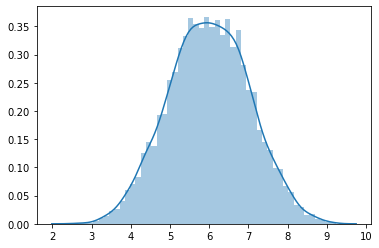

In [18]:
sns.distplot(distr_mean) # sampling distribution of the sample mean 

In [19]:
np.mean(distr_mean) # mean of the sampling distribution of the sample mean

5.993170681884679

In [20]:
np.var(distr_mean) # variance of the sampling distribution of the sample mean

1.0618965962566629

### Example 2.2 (Sampling Distribution of the Sample Range):

In [ ]:
distr_range = sample_distr(5, 10000, "range") # for range

In [ ]:
sns.distplot(distr_range) # sampling distribution of the sample range

In [ ]:
np.mean(distr_range) # mean of the sampling distribution of the sample range

In [ ]:
np.var(distr_range) # variance of the sampling distribution of the sample range

### Example 2.3 (Sampling Distribution of the Sample Median):

In [ ]:
distr_median= sample_distr(5, 10000, "median") # for median 

In [ ]:
sns.distplot(distr_median) # sampling distribution of the sample median

In [ ]:
np.mean(distr_median) # mean of the sampling distribution of the sample median

In [ ]:
np.var(distr_median) # variance of the sampling distribution of the sample median

### Example 3 (Sampling Distribution - from Uniform Distribution with sample size 25 and 10000 iterations):

In [ ]:
distr_mean = sample_distr(25, 10000, "mean") # for mean

In [ ]:
sns.distplot(distr_mean) # sampling distribution of the sample mean 

In [ ]:
np.mean(distr_mean) # mean of the sampling distribution of the sample mean

In [ ]:
np.var(distr_mean) # variance of the sampling distribution of the sample mean

Notice how when we increase the size of our sample size, the distribution becomes closer to normal, the mean of the Sampling Distribution approaches the population mean and the variance of the Sampling Distribution significantly decreses. This is because if our sample size that we take from the population is larger, it is more likely that the sample contains the true population mean. 

### Example 4 (Calculating Standard Error of the Sample Mean):

If we know the standard deviation of the original distribution and the sample size, we can determine the standard deviation of the sampling distribution. This standard deviation in the case of the sampling distribution of the sample mean is called the Standard Error. **calculate the sample standard error for the mean in ordinary way and using sampling distribution**

<center> $\sigma_{\bar x} = \frac {\sigma}{\sqrt{n}}$ </center>

In [26]:
# calculate standard error of the sampling distribution above in example 3
std_error_form = uniform_data.std() / math.sqrt(25)
std_error_form

0.46131252401191414

In [27]:
np.std(distr_mean) # same as above 

1.0304836710286402

Clearly, there is a relationship between the sample size and the standard deviation of the sampling distribution. 

### Solutions

### Problem 1:

The Executive Director at Metis is interested in learning how likely the students of this course from this cohort are to recommend the course to a friend. To measure this, the Executive Director provides a survey to the students and asks them how likely they are to recommend the course. 15 of 30 students answer the survey. Based on the answers of the 15 students who completed the survey, the Executive Director will make his conclusion. What is the Sample and what is the Population?

__Option A:__ Population = all students who have taken this course at Metis from all cohorts. Sample = all students from this course and cohort.

__Option B:__ Population = all students who have taken any course from Metis from all cohorts. Sample = all students of this course from all cohorts.

__Option C:__ Population = all students from this course and cohort. Sample = 15 students from this course and cohort who answered the survey

The answer is "Option C"